In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.linear_model import LinearRegression
from pandas import DataFrame
from scipy import stats


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

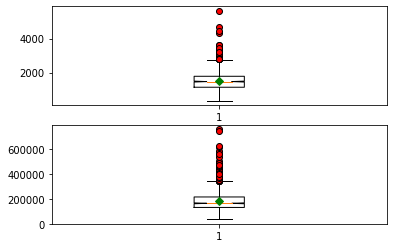

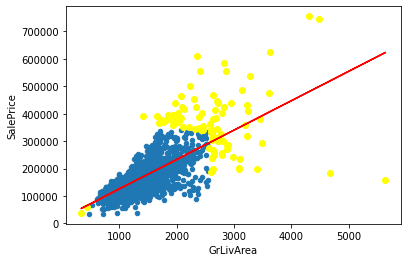

In [2]:
df1 = pd.read_csv('train.csv')
print(df1.head())


#df1.plot.scatter(x='GrLivArea', y='SalePrice', style='.')

#df1.boxplot(column =['GrLivArea','SalePrice'])
#df1.boxplot(column =['SalePrice'])
red_circle = dict(markerfacecolor='red', marker ='o')
mean_shape = dict(markerfacecolor='green', marker ='D', markeredgecolor='green')

fig, axs = plt.subplots(2)
axs[0].boxplot(df1['GrLivArea'], flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True)
axs[1].boxplot(df1['SalePrice'], flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True)


#independent GrLivArea, dependent SalePrice
#fit the training data
X= df1['GrLivArea'].values.reshape(-1,1)
Y= df1['SalePrice'].values.reshape(-1,1)

lr = linear_model.LinearRegression()
lr.fit(X,Y)

Y_pred= lr.predict(X)

# The coefficients
print("Coefficients: \n", lr.coef_)
# The mean squared error
#print("Mean squared error: %.2f" % mean_squared_error(Y, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
#print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

#supposed to plot testing datas with prediction data
df1.plot.scatter(x='GrLivArea', y='SalePrice', style='.')
plt.plot(X, Y_pred, color='red')


#find outliers
#workings
mean_price= df1["SalePrice"].mean()
sd_price= df1["SalePrice"].std()
print('Price mean: ', mean_price)
print('Price standard deviation:', sd_price)

highest_price = int(mean_price + (sd_price * 2))
lowest_price = int(mean_price - (sd_price * 2))
print( 'highest normal price', highest_price)
print( 'lowest normal price', lowest_price)

mean_GrLivArea= df1["GrLivArea"].mean()
sd_GrLivArea= df1["GrLivArea"].std()
print('GrLiveArea mean: ', mean_GrLivArea)
print('GrLivArea standard deviation:', sd_GrLivArea)

highest_GrLivArea = int(mean_GrLivArea + (sd_GrLivArea * 2))
lowest_GrLivArea = int(mean_GrLivArea - (sd_GrLivArea * 2))
print( 'highest normal GrLivArea', highest_GrLivArea)
print( 'lowest normal GrLivArea', lowest_GrLivArea)


#create new column titled 'isOutlierPrice'
def p(row):
    if row['SalePrice'] < lowest_price:
        val = '1'
    elif row['SalePrice'] > highest_price:
        val = '1'
    else:
        val = '0'
    return val

df1['isOutlierPrice'] = df1.apply(p, axis=1)

#create new column titled 'isOutlierGrLivArea'
def m(row):
    if row['GrLivArea'] < lowest_GrLivArea:
        val = '1'
    elif row['GrLivArea'] > highest_GrLivArea:
        val = '1'
    else:
        val = '0'
    return val

df1['isOutlierGrLivArea'] = df1.apply(m, axis=1)

print (df1)

#df2 has all outlier
df2= df1.query('SalePrice > 339806 or SalePrice < 22036 or GrLivArea > 2566 or GrLivArea < 464')
#print(df2)

#highlights outliers red on scatterplot
plt.scatter(df2.GrLivArea, df2.SalePrice, color = 'yellow')

plt.show()